In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X,y = mnist['data'], mnist['target']
print('X shape:',X.shape)
print('y shape:',y.shape)

#There are 70,000 images and each image has 784 features. This is because each image is
#28 x 28 pixels and each feature simply represents one pixel's intensity from 0 to 255

X shape: (70000, 784)
y shape: (70000,)


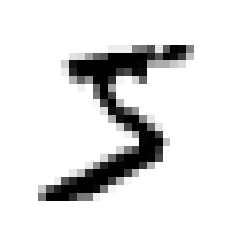

It is the number  5


In [21]:
#Lets take a peek at one digit from the dataset
import matplotlib as mpl
import matplotlib.pyplot as plt

random_number = 0
some_digit = X[random_number]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap='binary')
plt.axis('off')
plt.show()
print('It is the number ', y[random_number])

In [22]:
import numpy as np
y = y.astype(np.uint8)

In [23]:
#Split Train-Test Datasets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

Let's simplify the problem for now and only try to identify one digit- for example, the number 5.

In [24]:
y_train_5 = (y_train == 5) #True for all 5s, False for all other digits
y_test_5 = (y_test == 5)

In [25]:
from sklearn.linear_model import SGDClassifier

sgd_clf =  SGDClassifier(random_state =42)
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [26]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation

In [27]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, shuffle = True, random_state = 42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf =  clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.9669
0.91625
0.96785


Let's use the 'cross_val_score()' function to evaluate our 'SGDClassifier' model, using K-fold cross-validation with three folds. Remember that K-fold-cross-validation means splitting the training set into K folds (in this case, three) then making predictions and evaluating them on each fold using a model trained on the remaining folds

In [28]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [29]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y= None):
        return self
    
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [30]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

## Even all saying none of them has 5 has accuracy more than %90.

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [31]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images: 53892 of them were correctly classified as non-5s(true negative) while the remaining 687 were wrongly classified as non-5s (false positives). While the remaining 3530 were correctly classified as 5s (true positive), 1891 were wrongly classified as non-5s (false negatives)

* 53892 true negative
* 687 false positive
* 1891 false negative
* 3530 true positive